<a href="https://colab.research.google.com/github/yasirijazgoraya/TextUtils/blob/master/AI%20Multiclass%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [16]:

train = pd.read_csv('/content/Training Set.csv')
print('Shape of the train dataset :', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('train dataset with numerical features:', train.shape)
#train.drop(columns="Date", axis=1 inplace = True)
#train.fillna(0,inplace=True)
#test['target'].to_list()

test = pd.read_csv('/content/Test Set.csv')
test = test.select_dtypes(exclude=['object'])
#ID = test.Id
test.fillna(0,inplace=True)
#test.drop('Id',axis = 1, inplace = True)

print("")
print("List of features contained our dataset:",list(train.columns))

Shape of the train dataset : (7584, 13)

train dataset with numerical features: (7584, 12)

List of features contained our dataset: ['Hour', 'Weekday', 'Is Working Day', 'Previous Hour Price', 'SDSH DAP', 'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price', 'PWSH Price', 'PWA Price', 'target']


In [21]:
train.isnull().sum().sum()

0

In [22]:
#find unique value count
for i in train.columns:
    print(i+"\t"+ str(len(train[i].unique())))

Hour	24
Weekday	7
Is Working Day	8
Previous Hour Price	7285
SDSH DAP	7286
SDSH Volume	4868
Sgn0 VolumeDir	2597
P24HA Price	7533
PDSH Price	5933
PWSH Price	6929
PWA Price	7578
target	7285


In [24]:
#find unique value of each columns
for i in train.columns:
    print("Unique value of :>>{}({})\n{}\n)".format(i,len(train[i].unique()),train[i].unique()))

Unique value of :>>Hour(24)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
)
Unique value of :>>Weekday(7)
[4 5 6 7 1 2 3]
)
Unique value of :>>Is Working Day(8)
[7 5 2 4 6 3 8 1]
)
Unique value of :>>Previous Hour Price(7285)
[2400.41 2475.68 2484.4  ... 1463.07 1937.   1924.55]
)
Unique value of :>>SDSH DAP(7286)
[2479.45 2494.   2474.85 ... 1358.54 1772.66 1700.5 ]
)
Unique value of :>>SDSH Volume(4868)
[1383.7 1339.3 1309.4 ... 1850.3 1759.8 1614.3]
)
Unique value of :>>Sgn0 VolumeDir(2597)
[-100.7  -44.4  -29.9 ...  150.8  205.4  122.9]
)
Unique value of :>>P24HA Price(7533)
[3654.911667 3655.023333 3656.065833 ... 1613.068333 1613.6575
 1622.203333]
)
Unique value of :>>PDSH Price(5933)
[2473.   2459.38 2370.61 ... 1922.86 1719.45 1503.84]
)
Unique value of :>>PWSH Price(6929)
[1837.47 1434.83 1498.33 ... 1368.03 1335.67  183.26]
)
Unique value of :>>PWA Price(7578)
[2296.059524 2299.858393 2306.105833 ... 1444.07744  1447.464167
 1450.969405]
)
Unique 

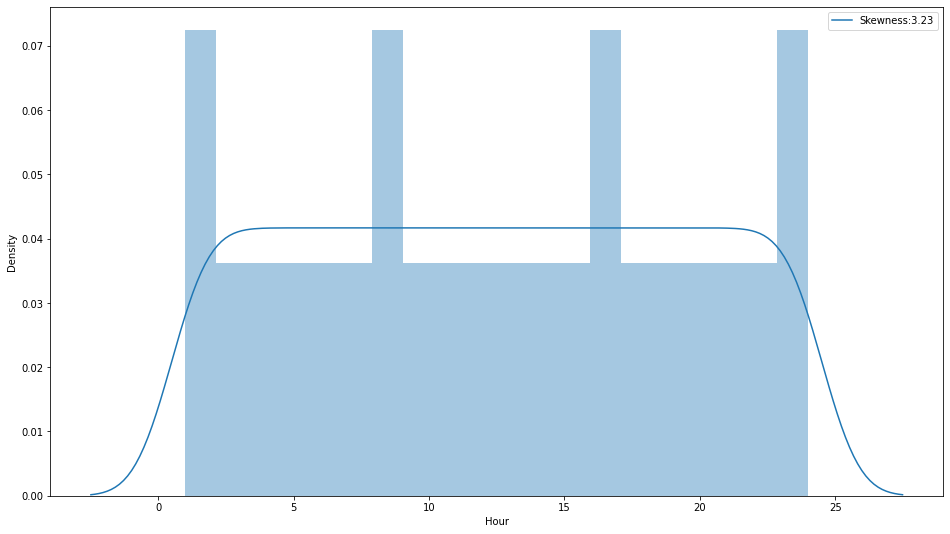

In [27]:
import seaborn as sns
plt.figure(figsize=(16,9))
bar= sns.distplot(train["Hour"])
bar.legend(["Skewness:{:,.2f}".format(train["target"].skew())])

(12.7, -0.5)

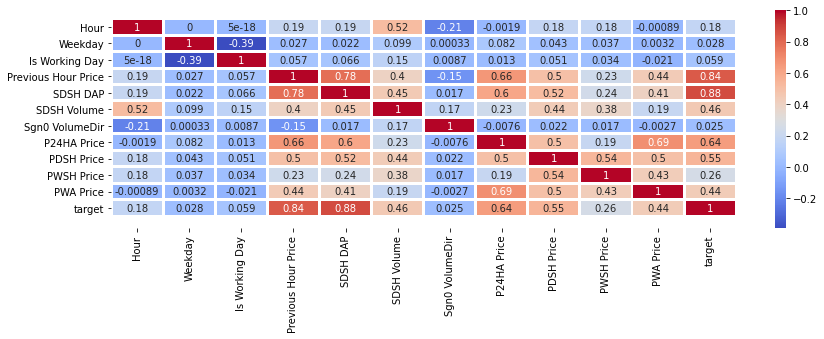

In [28]:
#correlation heatmap

plt.figure(figsize=(14,4))
ax=sns.heatmap(train.corr(),cmap="coolwarm",annot=True, linewidth=2)

# to fix the bug "first " and last row cut in half of heatmap plot"
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.7,top-0.5)

(5.5, -0.5)

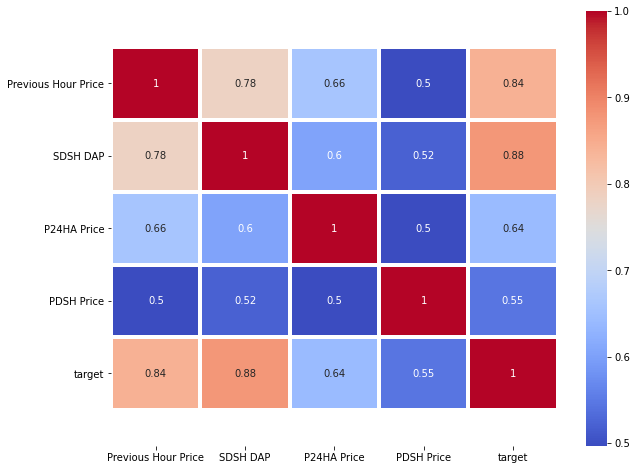

In [31]:
hig_corr=train.corr()
hig_corr_features=hig_corr.index[abs(hig_corr["target"])>=0.5]
plt.figure(figsize=(10,8))
ax=sns.heatmap(train[hig_corr_features].corr(),cmap="coolwarm",annot=True,linewidth=3)
# to fix the bug "first " and last row cut in half of heatmap plot"
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)


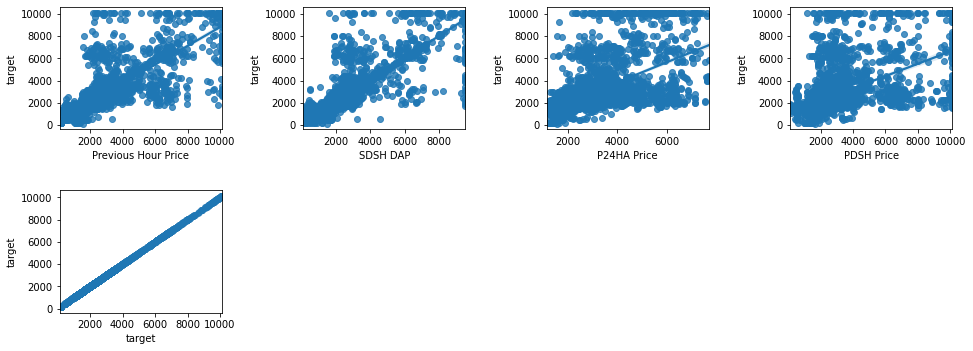

In [32]:
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i<=9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(data=train,x=hig_corr_features[i],y="target")

In [4]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 1108
Number of rows without outliers: 6476


In [5]:
train.head(3)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89


In [7]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('target')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('target',axis = 1))
mat_y = np.array(train.target).reshape((6476,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
# test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train.head()


,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,0.000000,0.5,0.857143,0.227769,0.346761,0.290591,0.496053,0.416807,0.235032,0.171439,0.216197,0.350547
1,0.043478,0.5,0.857143,0.235300,0.348870,0.248135,0.572673,0.416825,0.233669,0.131150,0.217124,0.351847
2,0.086957,0.5,0.857143,0.236173,0.346094,0.219545,0.592406,0.416999,0.224787,0.137504,0.218647,0.352218
3,0.130435,0.5,0.857143,0.236422,0.346647,0.205489,0.613092,0.417808,0.189847,0.133910,0.220082,0.359154
4,0.173913,0.5,0.857143,0.241078,0.394625,0.269268,0.723870,0.421367,0.205361,0.133253,0.221637,0.406459


In [8]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "target"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.target

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# Training for submission
training_sub = training_set[col_train]

In [9]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
2095,0.173913,0.500000,0.571429,0.136462,0.208341,0.233027,0.634594,0.083350,0.175262,0.174564,0.087341,0.204714
2415,0.521739,0.333333,0.571429,0.141483,0.249972,0.653375,0.648340,0.100700,0.171692,0.151866,0.092409,0.251633
3045,0.043478,0.333333,0.571429,0.191057,0.237842,0.266781,0.582608,0.159144,0.185463,0.186508,0.109879,0.281201
351,0.217391,1.000000,0.142857,0.340154,0.372327,0.263626,0.646570,0.541728,0.180720,0.180720,0.356486,0.381387
5494,0.391304,0.166667,0.714286,0.154256,0.327496,0.718780,0.796271,0.113088,0.174189,0.174189,0.093866,0.334703


In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import keras
seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=36, kernel_initializer='normal', activation='relu',input_shape=(11,)))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values

model.fit(np.array(feature_cols), np.array(labels), epochs=10, batch_size=10)

Epoch 1/100
434/434 [==============================] - 15s 2ms/step - loss: 0.0870
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0861
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0870
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0833
Epoch 5/100
434/434 [==============================] - 1s 1ms/step - loss: 0.0829
Epoch 6/100
434/434 [==============================] - 1s 1ms/step - loss: 0.0818
Epoch 7/100
434/434 [==============================] - 1s 1ms/step - loss: 0.0802
Epoch 8/100
434/434 [==============================] - 1s 1ms/step - loss: 0.0788
Epoch 9/100
434/434 [==============================] - 1s 1ms/step - loss: 0.0764
Epoch 10/100
434/434 [==============================] - 1s 1ms/step - loss: 0.0762
Epoch 11/100
434/434 [==============================] - 1s 1ms/step - loss: 0.0729
Epoch 12/100
434/434 [==============================] - 1s 1ms/step - loss: 0.0694
Epoch 13/100

In [ ]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(feature_cols), np.array(labels))

In [ ]:
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(feature_cols_test))
predictions = list(itertools.islice(y, testing_set.shape[0]))

In [ ]:
predictions = prepro_y.inverse_transform(np.array(predictions).reshape(2138,1))

In [ ]:
model.evaluate(x_test, y_test)

67/67 [==============================] - 0s 1ms/step - loss: 0.0067


0.006700942292809486

In [ ]:
from sklearn import ensemble

# Gradient Boosting Regressor
gbr = ensemble.GradientBoostingRegressor(n_estimators=700, max_depth=6, min_samples_split=2, 
                                         learning_rate=0.1, loss='lad' )
gbr.fit(x_train, y_train)
print(("Prediction score for GradientBoostingRegressor: {}").format(gbr.score(x_test, y_test)))

# Random Forest Regressor
rfg = ensemble.RandomForestRegressor(n_estimators=400,criterion='mae')
rfg.fit(x_train, y_train)
print(("Prediction score for RandomForestRegressor: {}").format(rfg.score(x_test, y_test)))

# Extra Tree Regressor
etg = ensemble.ExtraTreesRegressor(n_estimators=400 , max_depth = 5)
etg.fit(x_train, y_train)
print(("Prediction score for ExtraTreeRegressor: {}").format(etg.score(x_test, y_test)))

isf = ensemble.IsolationForest(n_estimators=400 , max_depth = 5)
isf.fit(x_train, y_train)
print(("Prediction score for ExtraTreeRegressor: {}").format(isf.score(x_test, y_test)))

Prediction score for GradientBoostingRegressor: 0.8132766500988994
Prediction score for RandomForestRegressor: 0.7908205049881153
Prediction score for ExtraTreeRegressor: 0.7871744415099716


TypeError: ignored

In [ ]:
# place columns in both train and test set in the same order
test = test[train.columns]

In [ ]:
pred = gbr.predict(x_test)
submission = pd.DataFrame()

submission["target"] = pred.round(2)

submission.to_csv("my_submission.csv", index=False)
submission.head(10)

,target
0,0.21
1,0.24
2,0.25
3,0.59
4,0.31
5,0.20
6,0.22
7,0.33
8,0.23
9,0.30
